PREDVIDJANJE TRAJANJA HOSPITALIZACIJE PACIJENATA

Vizuelno i analiticko objasnjenje koraka prilikom analize podataka. Glavni deo projekta implementiran je u Python fajlovima.

In [11]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.load_data import *
from src.eda import *
from src.preprocessing import *

Ucitavanje podataka.

In [12]:
df = load_data("../data/LengthOfStay.csv")
#df.head(5).T

Analiza ciljne promenljive `lengthofstay`
Prikazana je distribucija ciljne promenljive.
Na osnovu histograma i boxplota-a uocava se prisustvo asimetrije (Right-skew) i ekstremnih vrednosti u distribuciji ciljne promenljive.

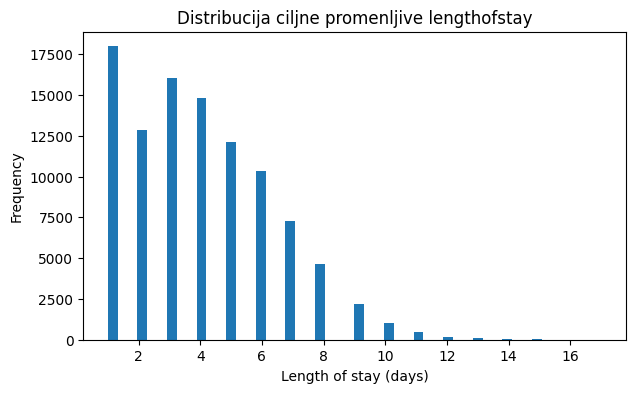

In [13]:
plot_target_distribution(df['lengthofstay'])

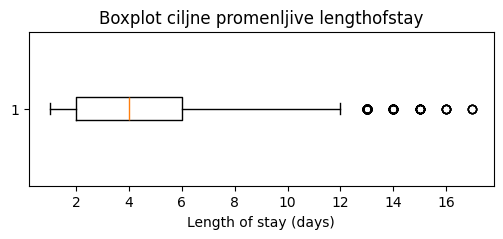

In [14]:
plot_target_outliers(df['lengthofstay'])

Analiza nedostajucih vrednosti. Nema nedostajucih vrednosti ni u jednoj koloni.

In [15]:
missing_values(df)

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

Pretprocesiranje podataka. Priprema skupa za dalju analizu. Prvo uklanjanje neinformativnih kolona, zatim obrada kategorickih promenljivih.

Ukolnjene su kolone: `eid`, `vdate` i `discharged`

In [16]:
df = drop_non_informative_columns(df)

Kategoricke promenljive obradjene su primenon one-hot enkodovanja.

In [17]:
df =  encode_categorical_features(df)

Kolone sa bool vrednostima pretvorene u 0/1.

In [18]:
df = encode_boolean_features(df)
df.head().T

,0,1,2,3,4
dialysisrenalendstage,0.000000,0.000000,0.000000,0.000000,0.000000
asthma,0.000000,0.000000,0.000000,0.000000,0.000000
irondef,0.000000,0.000000,0.000000,0.000000,0.000000
pneum,0.000000,0.000000,0.000000,0.000000,1.000000
substancedependence,0.000000,0.000000,0.000000,0.000000,0.000000
psychologicaldisordermajor,0.000000,0.000000,0.000000,0.000000,1.000000
depress,0.000000,0.000000,0.000000,0.000000,0.000000
psychother,0.000000,0.000000,0.000000,0.000000,0.000000
fibrosisandother,0.000000,0.000000,0.000000,0.000000,0.000000
malnutrition,0.000000,0.000000,0.000000,0.000000,0.000000


Korelaciona analiza. Vecina promenljivih ne pokazuje jaku linearnu vezu sa ciljnom promenljivom. Sto je ocekivano za medicinske podatke, trajanje hospitalizacije zavisi od kombinacije vise faktora i njihovih medjusobnih interakcija, a ne od pojedinacnih atributa.

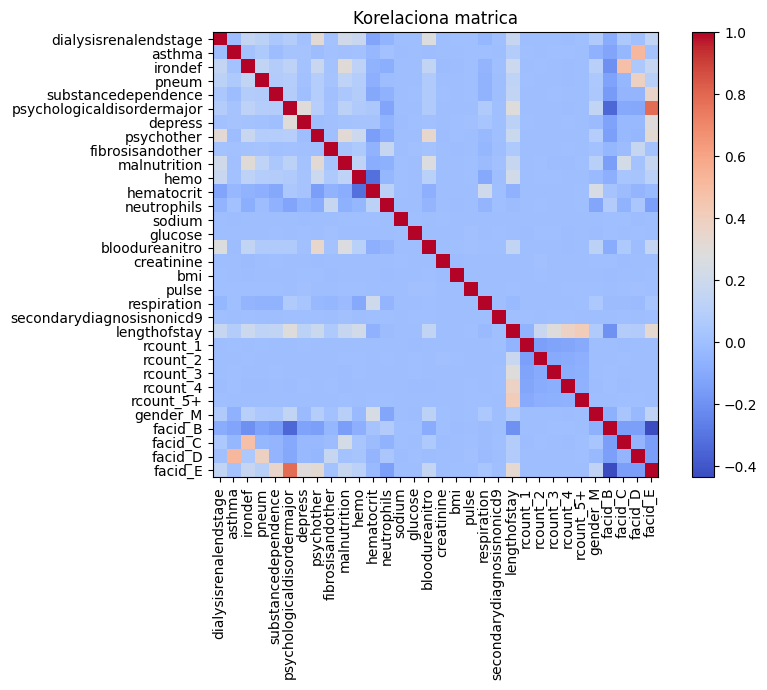

In [19]:
correlation_with_target(df)
plot_correlation_heatmap(df)